In [207]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Exercise 2, part A : Dataset pre-processing

### Airfare Data

In [56]:
### Load the data into pandas Dataframe

air_df = pd.read_csv("datasets/airq402.data", sep="\s+", header=None)
air_df.columns = ['city1', 'city2', 'avg_fare', 'distance','passengers',
        'leading_airline','market_share', 'avg_fare2', 'low_price_air',
        'market_share_2', 'price']

In [57]:
air_df

,city1,city2,avg_fare,distance,passengers,leading_airline,market_share,avg_fare2,low_price_air,market_share_2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


#### Convert non-numeric types to numeric

In [58]:
cat_columns = air_df.select_dtypes(['object']).columns
cat_columns

Index(['city1', 'city2', 'leading_airline', 'low_price_air'], dtype='object')

In [59]:
air_df[cat_columns] = air_df[cat_columns].apply(lambda x: pd.factorize(x)[0])


In [60]:
air_df

,city1,city2,avg_fare,distance,passengers,leading_airline,market_share,avg_fare2,low_price_air,market_share_2,price
0,0,0,114.47,528,424.56,0,70.19,111.03,0,70.19,111.03
1,0,1,122.47,860,276.84,0,75.10,123.09,1,17.23,118.94
2,1,0,214.42,852,215.76,1,78.89,223.98,2,2.77,167.12
3,1,2,69.40,288,606.84,2,96.97,68.86,3,96.97,68.86
4,1,3,158.13,723,313.04,3,39.79,161.36,3,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,86,7,136.16,1104,184.34,4,33.37,135.82,1,28.65,118.51
996,87,7,83.28,200,232.71,0,99.57,82.55,0,99.57,82.55
997,88,19,159.97,814,843.80,4,46.19,159.65,1,13.89,159.02
998,88,64,73.57,174,214.45,2,99.74,73.44,3,99.74,73.44


#### Drop rows with missing values
No missing values found

In [61]:
air_df.isnull().any(axis=0).sum()

0

Plotting correlation between columns to find relevant columns.

<AxesSubplot:>

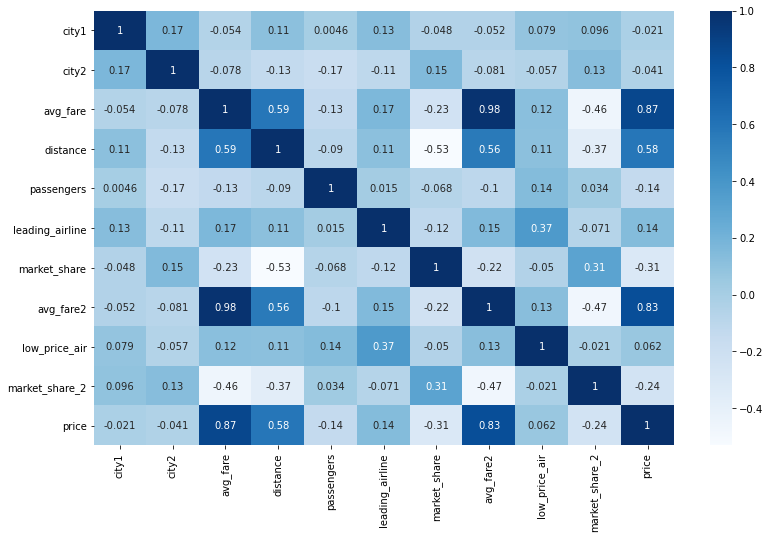

In [62]:
plt.figure(figsize=(13, 8))
sns.heatmap(air_df.corr(), annot=True, cmap='Blues')

#### Dropping irrelevant columns

There are two columns for "average fare", both of which are highly correlated. SO, it makes sense to keep one of them. Now, lets look at how price (the target) is correlated to other attributed. From correlation values: "city1", "city2" and "low_price_airline" attributed can also be dropped.

In [66]:
air_df = air_df.drop(columns = ['city1', 'city2','avg_fare2','low_price_air'], axis=1)

#### Split dataset into train and test

In [69]:
train, test = train_test_split(air_df, test_size=0.2, random_state=42, shuffle=True)

In [78]:
train = train.reset_index()
test = test.reset_index()

## Exercise 2, part B: Linear Regression with Gradient Descent

In [297]:
## Creating train_x, train_y, test_x and test_y

train_y = train['price']
train_x = train.drop(columns=['price'])

test_y = test['price']
test_x = test.drop(columns=['price'])

**Normalize X, so that every attribute is at the same scale.**

In [298]:
## Mean Normalization of the data
scaler = MinMaxScaler()
train_x = pd.DataFrame(scaler.fit_transform(train_x),
            columns=train_x.columns, index=train_x.index) 

test_x = pd.DataFrame(scaler.fit_transform(test_x),
            columns=test_x.columns, index=test_x.index) 

**Prepare X and Y for the linear regression**

In [299]:
X = train_x.to_numpy()
Y = train_y.to_numpy()

Y = np.atleast_2d(Y).T

X_test = test_x.to_numpy()
Y_test = test_y.to_numpy()

Y_test = np.atleast_2d(Y_test).T

In [300]:
X = np.hstack((np.atleast_2d(np.ones(len(X))).T, X))
X_test = np.hstack((np.atleast_2d(np.ones(len(X_test))).T, X_test))

**Implementation of Linear regression with Gradient Descent**

In [416]:
def learn_linear_reg_GD(X,Y,X_test, Y_test, params,alpha,imax):
    '''
    Objective is to minimize the loss.
    This function implements linear regression and learns parameters through application of Gradient Descent on loss
    '''
    # Track the path of loss values, plot these values in the end
    train_diffs = []
    test_losses = []
    
    Y_hat = np.matmul(X,params)
    prev_train_loss = np.sum(np.square(Y - Y_hat))
    
    for i in range(imax):
        # Predict Y for train and test
        Y_hat = np.matmul(X,params)
        Y_hat_test = np.matmul(X_test,params)
        
        
        # Updating params by applying negative gradient
        gradient = -2*(np.matmul(X.T, (Y - Y_hat)))
        params = params - ((alpha)*gradient)
        
        # Predict Y for train and test, updates params
        Y_hat = np.matmul(X,params)
        Y_hat_test = np.matmul(X_test,params)
        
        # Calculate absolute difference between previous loss and current loss
        train_loss = np.sum(np.square(Y - Y_hat))
        diff = np.abs(train_loss - prev_train_loss)
        train_diffs.append(diff)
        
        prev_train_loss = train_loss
        
        # Calculate RMSE on test set
        test_rmse = np.sqrt((np.sum(np.square(Y_test - Y_hat_test)))/len(X_test))
        test_losses.append(test_rmse)
        
    print("Final rmse value:", test_rmse)  
    return (train_diffs, test_losses)

**Initialize the hyperparameters**

In [400]:
# length of parameter vector
num_param = len(X[0])

# initializing parameter vector
params = np.ones((num_param,1))

# Intializing steplength: alpha
alpha = 0.00033

# Initializing imax
imax = 500

In [401]:
(train_diffs, test_losses) = learn_linear_reg_GD(X,Y,X_test, Y_test, params,alpha,imax)

#### Plotting difference of train losses and rmse on test set

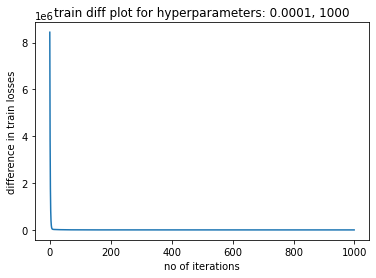

In [356]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

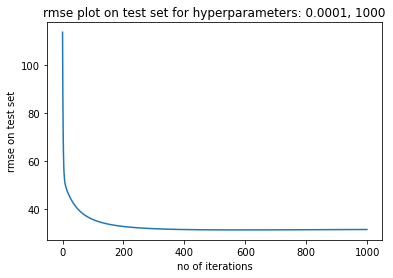

In [357]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

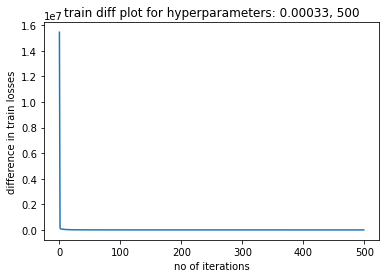

In [402]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

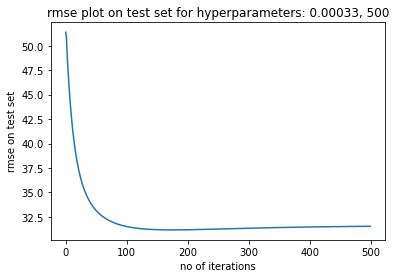

In [373]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

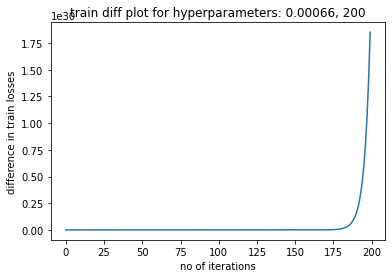

In [394]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

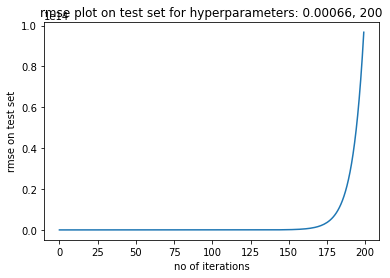

In [393]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

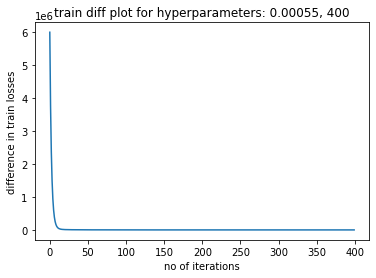

In [397]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

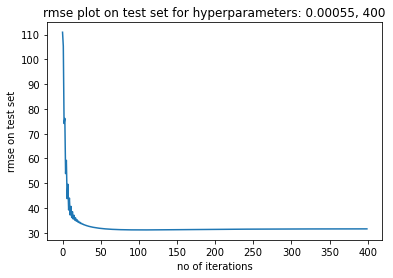

In [398]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

#### Explanation of graphs:
1. The steplength (alpha) has been tried for: [0.0001, 0.00033, 0.00055, 0.00066]
2. imax has been varied for :[100,200,500,1000]
3. **Observations: alpha=0.0001 is very small and hence results in slow convergence.**

4. **alphas=[0.00033 and 0.00055] are more optimal. alpha = [0.00066] is higher than required, hence it doesn't provide convergence.**
5. The difference between losses becomes small with every iteration because loss function starts to become flat when approaching its minima. (--> gradient becomes smaller and hence update in params is also smaller)
6. RMSE in test set is decreasing with every iteration that means model is learning.

## Exercise 3 : Steplength control for Gradient Descent

#### Implementation  of steplength-bolddriver algorithm

Explanation : When the loss value increases from the last iteration, then decrease steplength by 50%. If loss value 
decreases from the last iteration, then increase steplength by 5%. Starting value of steplength is taken as 1.

In [403]:
def linear_reg_bolddriver(X,Y,X_test, Y_test, params,alpha,imax):
    '''
    Implementation of steplength bolddriver for gradient descent
    '''
    
    # Track the path of loss values, plot these values in the end
    train_diffs = []
    test_losses = []
    track_alpha = [alpha]
    
    Y_hat = np.matmul(X,params)
    prev_train_loss = np.sum(np.square(Y - Y_hat))
    
    for i in range(imax):
        # Predict Y for train
        Y_hat = np.matmul(X,params)
        
        
        # Updating params by applying negative gradient
        gradient = -2*(np.matmul(X.T, (Y - Y_hat)))
        params = params - ((alpha)*gradient)
        
        # Predict Y for train and test, after updated params
        Y_hat = np.matmul(X,params)
        Y_hat_test = np.matmul(X_test,params)
        
        # Calculate absolute difference between previous loss and current loss
        train_loss = np.sum(np.square(Y - Y_hat))
        diff = np.abs(train_loss - prev_train_loss)
        train_diffs.append(diff)
        
        # BOLDDRIVER LOGIC : ADAPTING ALPHA According to the loss value
        if(train_loss > prev_train_loss):
            alpha = alpha/2
        else:
            alpha = alpha*1.05
        
        prev_train_loss = train_loss
        track_alpha.append(alpha)
        
        # Calculate RMSE on test set
        test_rmse = np.sqrt((np.sum(np.square(Y_test - Y_hat_test)))/len(X_test))
        test_losses.append(test_rmse)
        
    print("test RMSE final (Bolddriver algorithm):", test_rmse)   
    return (train_diffs, test_losses, track_alpha)  

In [408]:
# length of parameter vector
num_param = len(X[0])

# initializing parameter vector
params = np.ones((num_param,1))

# Intializing steplength: alpha, ## Initial value of alpha = 1
alpha = 1

# Initializing imax
imax = 1000

In [409]:
(train_diffs, test_losses, track_alpha) = linear_reg_bolddriver(X,Y,X_test, Y_test, params,alpha,imax) 

test RMSE final (Bolddriver algorithm): 137.79905000709908


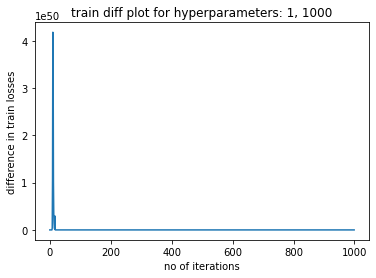

In [410]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

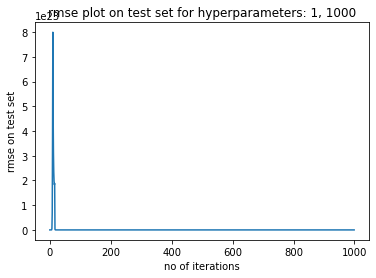

In [411]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

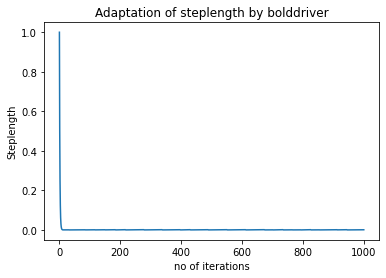

In [412]:
plt.plot(track_alpha)
plt.xlabel("no of iterations")
plt.ylabel("Steplength")
plt.title("Adaptation of steplength by bolddriver")
plt.show()

**Adaptations of steplength by bolddriver algorithm shown below:**

In [413]:
track_alpha

[1,
 0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625,
 0.00048828125,
 0.0005126953125,
 0.000538330078125,
 0.0005652465820312501,
 0.0005935089111328126,
 0.0006231843566894533,
 0.00031159217834472665,
 0.000327171787261963,
 0.00034353037662506115,
 0.0003607068954563142,
 0.00037874224022912994,
 0.00039767935224058643,
 0.0004175633198526158,
 0.0004384414858452466,
 0.00046036356013750895,
 0.00048338173814438444,
 0.0005075508250516037,
 0.0005329283663041839,
 0.0005595747846193932,
 0.0005875535238503628,
 0.000616931200042881,
 0.0003084656000214405,
 0.00032388888002251253,
 0.0003400833240236382,
 0.0003570874902248201,
 0.00037494186473606113,
 0.00039368895797286423,
 0.00041337340587150744,
 0.0004340420761650828,
 0.00045574417997333697,
 0.00047853138897200383,
 0.000502457958420604,
 0.0005275808563416343,
 0.000553959899158716,
 0.0005816578941166519,
 0.0006107407888224845,
 0.0006412778282636087,
 0.0006733417

#### Implementation of the steplength-backtracking algorithm

In [414]:
def backtracking_linesearch(X,Y,beta,alpha,params):
    '''
    Implementation of the stepsize-backtracking algorithm
    '''
    track_alpha = [alpha]
    
    # Predict Y for train
    Y_hat = np.matmul(X,params)

    # calculating gradient
    gradient = -2*(np.matmul(X.T, (Y - Y_hat)))
    gradient_2 = np.square(gradient)

    params_new = params - alpha*(gradient)
    Y_hat_new = np.matmul(X,params_new)
    lhs = np.sum(np.square(Y - Y_hat_new))
    
    rhs = (np.sum(np.square(Y - Y_hat))) - (alpha/2)*np.sum(gradient_2)
    
    while(lhs > rhs):
        alpha = alpha*beta
        track_alpha.append(alpha)
        
        params_new = params - alpha*(gradient)
        Y_hat_new = np.matmul(X,params_new)
        lhs = np.sum(np.square(Y - Y_hat_new))

        rhs = (np.sum(np.square(Y - Y_hat))) - (alpha/2)*np.sum(gradient_2)

    return (alpha,track_alpha)


In [418]:
# Initialize hyper-parameter for backtracking line search

beta = 0.508
alpha = 1
imax = 800

(alpha,track_alpha) = backtracking_linesearch(X,Y,beta,alpha,params)

In [419]:
(train_diffs, test_losses) = learn_linear_reg_GD(X,Y,X_test, Y_test, params,alpha,imax)

Final rmse value: 31.58383357826967


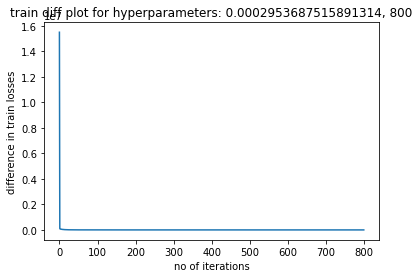

In [420]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

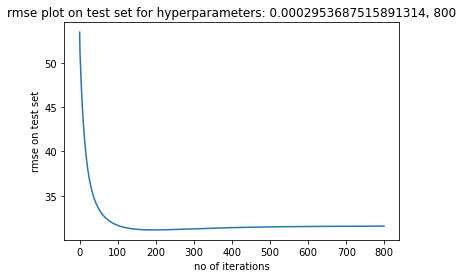

In [421]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

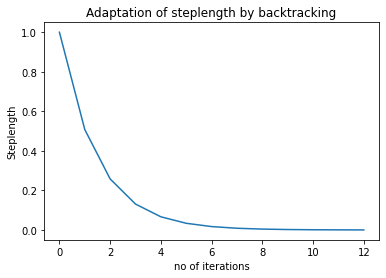

In [422]:
plt.plot(track_alpha)
plt.xlabel("no of iterations")
plt.ylabel("Steplength")
plt.title("Adaptation of steplength by backtracking")
plt.show()

**Adaptation of learning rate in backtracking line search algorithm**

In [423]:
track_alpha

[1,
 0.508,
 0.258064,
 0.131096512,
 0.066597028096,
 0.033831290272768,
 0.017186295458566144,
 0.008730638092951602,
 0.004435164151219414,
 0.0022530633888194623,
 0.001144556201520287,
 0.0005814345503723058,
 0.0002953687515891314]

#### Implementation of look-ahead optimizer algorithm

This algorithm maintains slow weights and fast weights.
After every K iterations, slow weights are synchronized with fast weights. 

In [424]:
def look_ahead_optimizer(X,Y,K,alpha,beta,params):
    '''
    Implementation of Lookahead optimizer
    beta is used for updating fast weights
    alpha is used for updating slow weights
    '''
    # Track the path of loss values, plot these values in the end
    train_diffs = []
    test_losses = []
    
    Y_hat = np.matmul(X,params)
    prev_train_loss = np.sum(np.square(Y - Y_hat))
    
    fast_params = np.ones(len(X[0]))
    
    for i in range(imax):
        ## Synchronize params
        fast_params = np.array(params)
        
        ## Running k iterations
        for k in range(K):     
            # Predict Y for train
            Y_hat = np.matmul(X,fast_params)


            # Updating params by applying negative gradient
            gradient = -2*(np.matmul(X.T, (Y - Y_hat)))
            fast_params = fast_params - ((beta)*gradient)
        
        # Updating slow weights
        params = params + alpha*(fast_params-params)
        
        # Predict Y for train and test, after updated params
        Y_hat = np.matmul(X,params)
        Y_hat_test = np.matmul(X_test,params)
        
        # Calculate absolute difference between previous loss and current loss
        train_loss = np.sum(np.square(Y - Y_hat))
        diff = np.abs(train_loss - prev_train_loss)
        train_diffs.append(diff)
        
        
        # Calculate RMSE on test set
        test_rmse = np.sqrt((np.sum(np.square(Y_test - Y_hat_test)))/len(X_test))
        test_losses.append(test_rmse)
        
    print("Final rmse value for lookahead:", test_rmse)
    return (train_diffs, test_losses)

**Hyperparameters for lookahead optimizer algorithm**

In [433]:
# length of parameter vector
num_param = len(X[0])

# initializing parameter vector
params = np.ones((num_param,1))

imax = 800
alpha = 0.0000022
beta = 0.000033
K = 10

(train_diffs, test_losses) = look_ahead_optimizer(X,Y,K,alpha,beta,params)

Final rmse value for lookahead: 154.35217297905243


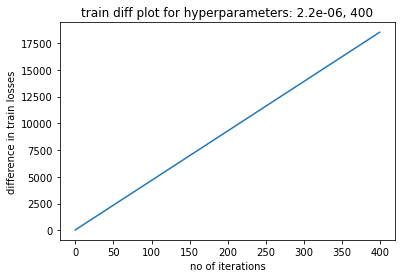

In [430]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

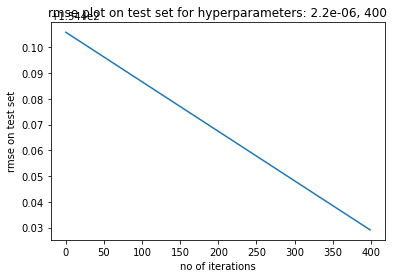

In [431]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

### Comparison of step-controller algorithms:

| Algorithm         | RMSE     | 
|--------------|-----------|
| Bolddriver | 137.79      |
| Backtracking line search      | 31.583  | 
| Lookahead optimizer      | 154.352 | 

**For this dataset, backtracking performs better than others.**